Populating the interactive namespace from numpy and matplotlib
[('paviaU', (610, 340, 103), 'double')]
[('paviaU_gt', (610, 340), 'uint8')]


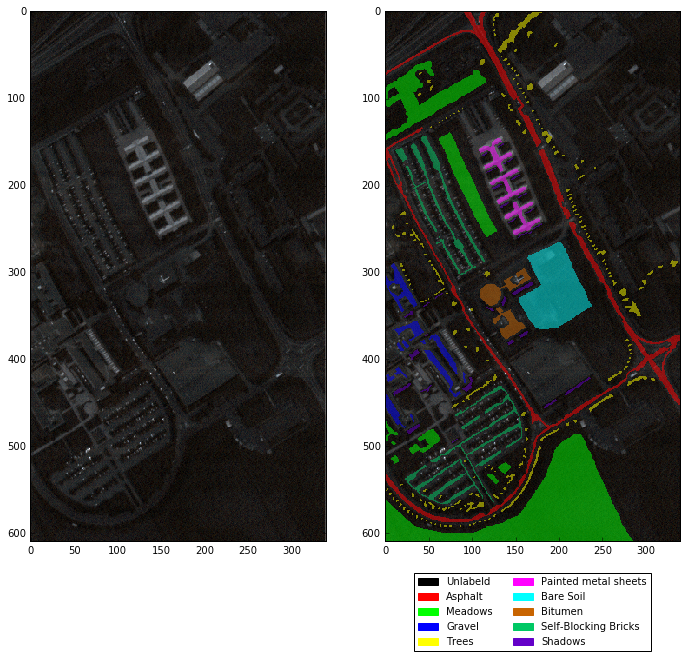

Label    Name                      Count     
0        Unlabeld                  164624    
1        Asphalt                   6631      
2        Meadows                   18649     
3        Gravel                    2099      
4        Trees                     3064      
5        Painted metal sheets      1345      
6        Bare Soil                 5029      
7        Bitumen                   1330      
8        Self-Blocking Bricks      3682      
9        Shadows                   947       


In [1]:
%run './../interface/hyperspectral_image.ipynb'

# Defining the model

In [2]:
%run './../interface/tensorflow_defaults.ipynb'

In [3]:
%run './../interface/tensorflow_functions.ipynb'

In [4]:
XTrain = tf.constant(value=hyimage.splitPixels(stratified=True).XTrain, dtype=tf.float32, name='XTrain')
YTrain = tf.constant(value=hyimage.splitPixels(stratified=True).YTrain, dtype=tf.int32, name='YTrain')

In [5]:
X = tf.placeholder_with_default(input=XTrain, shape=None, name='X')
Y = tf.placeholder_with_default(input=YTrain, shape=None, name='Y')

In [6]:
W = tf.Variable(tf.truncated_normal([hyimage.bandAmount, 1], seed=RANDOM_STATE), name='W')
b = tf.Variable(tf.truncated_normal([1, 1], seed=RANDOM_STATE), name='b')

In [7]:
YhatContinuous = tf.add(tf.matmul(X, W), b)
Yhat = tf.to_int32(YhatContinuous)

In [8]:
loss = tf.reduce_sum(tf.pow(tf.to_float(Y) - YhatContinuous, 2))

In [9]:
gd = tf.train.GradientDescentOptimizer(learning_rate=0.000005, name='GradientDescentOptimizer')
train_step = gd.minimize(loss)

In [10]:
tf.initialize_all_variables().run()

In [11]:
train_step.run()
loss.eval()

38273.043

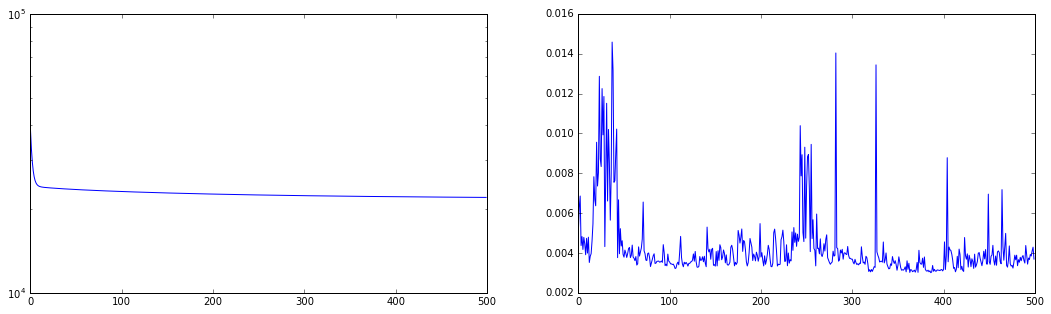

In [12]:
tfMinimize(_steps=500, _train_step=train_step, _loss=loss)

In [13]:
loss.eval()

21971.488

In [14]:
W.eval()[0:5]

array([[-0.21829098],
       [-1.15499389],
       [-0.72214681],
       [-0.45259082],
       [-0.68717724]], dtype=float32)

In [15]:
YhatContinuous.eval()[0:5]

array([[ 3.67193794],
       [ 4.24855232],
       [ 3.17938375],
       [ 2.94862151],
       [ 4.19573832]], dtype=float32)

# Model Evaluation

In [16]:
%run './../interface/model_evaluation_functions.ipynb'

In [17]:
tfAccuracy(YTensor=Y, YHatTensor=Yhat)

0.21627308

## Test data

In [18]:
feedTest = {X: hyimage.splitPixels(stratified=True).XTest, Y: hyimage.splitPixels(stratified=True).YTest}

In [19]:
tfAccuracy(YTensor=Y, YHatTensor=Yhat, feed=feedTest)

0.22000572

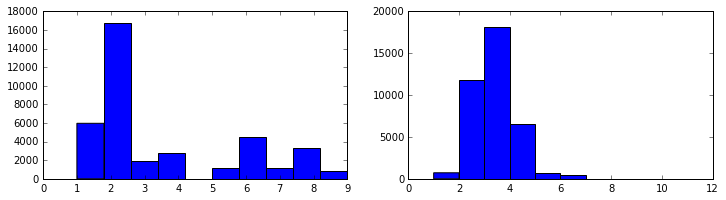

In [20]:
compareLabels(originalLabels=hyimage.splitPixels(stratified=True).YTest, predictedLabels=Yhat.eval(feed_dict=feedTest))

## Overall visualisation

In [21]:
feedAll = {X: hyimage.pixelsScaled, Y: hyimage.pixelLabels}

In [22]:
tfAccuracy(YTensor=Y, YHatTensor=Yhat, feed=feedAll)

0.045303762

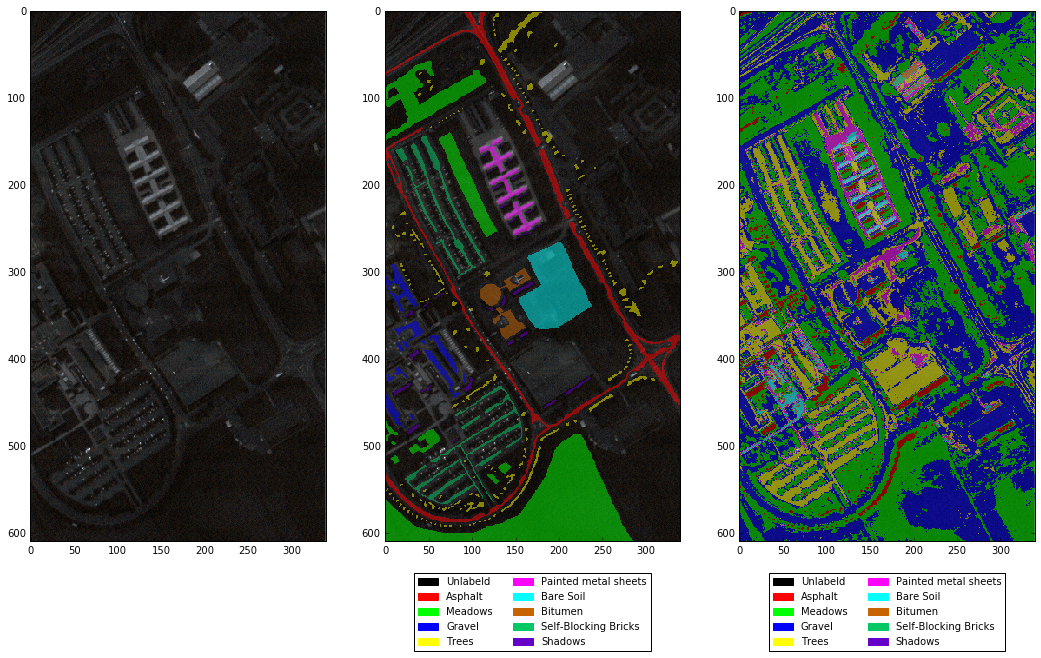

In [23]:
hyImageCompare(hyimage, Yhat.eval(feed_dict=feedAll).reshape(hyimage.labels.shape))